In [1]:
%cd '/content/drive/My Drive/emotions_intensity'

/content/drive/My Drive/emotions_intensity


In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import wordcloud
import numpy as np
import re

In [3]:
DATA_DIR = 'data'
T1_TRAIN = DATA_DIR+'/anger-ratings-0to1.train.txt'
T1_TEST = DATA_DIR+ '/anger-ratings-0to1.test.gold.txt'
T2_TRAIN = DATA_DIR+'/joy-ratings-0to1.train.txt'
T2_TEST = DATA_DIR+'/joy-ratings-0to1.test.gold.txt'
all_files = [T1_TRAIN,T1_TEST,T2_TRAIN,T2_TEST]

In [4]:
def read_data(data_file_path):
    #df = pd.DataFrame(columns=['ID','article','emotion','score'])
    data_list = list()
    with open(data_file_path) as input_file:
        for line in input_file:
            line = line.strip()
            array = line.split('\t')
            #print(array)
            data_list.append([array[0], array[1], array[2], float(array[3])])
            #df = df.append([[array[0],str(array[1]),array[2],float(array[3])]])
    
    return pd.DataFrame(data_list, columns=['ID','article','emotion','score'])

# STATISTICS

In [5]:
columns = []
records = {"Samples":[],
           "Duplicated Examples":[],
           "Duplicated Articles":[],
           "Mean Char Count (Articles)":[],
          "Std Char Count (Articles)":[],
           "Max Char Count (Articles)":[],
           "Min Char Count (Articles)":[],
           "Mean Word Count (Articles)":[],
           "Std Word Count (Articles)":[],
           "Max Word Count (Articles)":[],
           "Min Word Count (Articles)":[],
          }

for fil in all_files:
    name_of_file = " ".join(fil.split('/')[-1].split('.')[0:2])
    columns.append(name_of_file)

    df = read_data(fil)
    #print(df.head())
    records["Samples"].append(df.shape[0])
    records["Duplicated Examples"].append(df[df.duplicated()].shape[0])

    
    records["Duplicated Articles"].append(df[df[['article']].duplicated()].shape[0])
    article_char_length = df['article'].apply(lambda x : len(x))
    records["Mean Char Count (Articles)"].append(article_char_length.mean())
    records["Std Char Count (Articles)"].append(article_char_length.std())
    records["Max Char Count (Articles)"].append(article_char_length.max())
    records["Min Char Count (Articles)"].append(article_char_length.min())
    
    article_word_length = df['article'].apply(lambda x : len(x.split()))
    records["Mean Word Count (Articles)"].append(article_word_length.mean())
    records["Std Word Count (Articles)"].append(article_word_length.std())
    records["Max Word Count (Articles)"].append(article_word_length.max())
    records["Min Word Count (Articles)"].append(article_word_length.min())
    
stats_df_words = pd.DataFrame.from_dict(records,columns=columns, orient="index")
print(stats_df_words.to_markdown(tablefmt="github"))

|                            |   anger-ratings-0to1 train |   anger-ratings-0to1 test |   joy-ratings-0to1 train |   joy-ratings-0to1 test |
|----------------------------|----------------------------|---------------------------|--------------------------|-------------------------|
| Samples                    |                   857      |                 760       |                823       |               714       |
| Duplicated Examples        |                     0      |                   0       |                  0       |                 0       |
| Duplicated Articles        |                     0      |                   0       |                  0       |                 0       |
| Mean Char Count (Articles) |                    92.6523 |                  95.8237  |                 95.1094  |                95.0798  |
| Std Char Count (Articles)  |                    37.6789 |                  35.9481  |                 34.999   |                36.7963  |
| Max Char Co

# MOST FREQUENT TOKENS

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
sw = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
counts = {"Unique Token Count":[],"Total Count":[]}
columns = []
all_freq_df = None
for fil in all_files:
    name_of_file = " ".join(fil.split('/')[-1].split('.')[0:2])
    columns.append(name_of_file)

    df = read_data(fil)
    df['article']=df['article'].apply(lambda x : x.lower())
    text = df['article'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))
    text = text.apply(lambda x : word_tokenize(x))
    text = text.apply(lambda x: np.array([y.lower() for y in x if y.lower() not in sw])).values
    tokencount = {}
    for split_sentence in text:
        for token in split_sentence:
            if(token in tokencount):
                tokencount[token]+=1
            else:
                tokencount[token]=1
    
    counts["Unique Token Count"].append(len(tokencount))
    token_counter = Counter(tokencount)
    total_count = np.sum(list(tokencount.values()))
    counts["Total Count"].append(total_count)
    #print("Most Common Words")
    # print("="*30)
   

    rows = {"Word":[],"Count":[],"Frequency":[]}
    for token,count in token_counter.most_common(20):
        #print(f"{token}: {count}, {count/total_count}")
        rows["Word"].append(token)
        rows["Count"].append(count)
        rows["Frequency"].append(count/total_count)

    freq_words_df = pd.DataFrame.from_dict(rows)
    if(all_freq_df is None):
        all_freq_df = freq_words_df
    else:
        all_freq_df = pd.concat([all_freq_df,freq_words_df],axis=1)
    
counts_df = pd.DataFrame.from_dict(counts,orient="index",columns=columns)


In [8]:
print(counts_df.to_markdown(tablefmt="github"))

|                    |   anger-ratings-0to1 train |   anger-ratings-0to1 test |   joy-ratings-0to1 train |   joy-ratings-0to1 test |
|--------------------|----------------------------|---------------------------|--------------------------|-------------------------|
| Unique Token Count |                       3360 |                      3153 |                     3313 |                    2995 |
| Total Count        |                       7925 |                      7394 |                     7757 |                    6632 |


In [9]:
print(all_freq_df.to_markdown(tablefmt="github"))

|    | Word     |   Count |   Frequency | Word    |   Count |   Frequency | Word      |   Count |   Frequency | Word      |   Count |   Frequency |
|----|----------|---------|-------------|---------|---------|-------------|-----------|---------|-------------|-----------|---------|-------------|
|  0 | im       |      75 |  0.00946372 | im      |      64 |  0.00865567 | lively    |      98 |  0.0126338  | happy     |      80 |  0.0120627  |
|  1 | like     |      68 |  0.00858044 | like    |      53 |  0.00716797 | im        |      70 |  0.00902411 | amp       |      49 |  0.00738842 |
|  2 | anger    |      53 |  0.0066877  | dont    |      47 |  0.00635651 | happy     |      68 |  0.00876628 | love      |      49 |  0.00738842 |
|  3 | dont     |      52 |  0.00656151 | get     |      45 |  0.00608602 | watch     |      68 |  0.00876628 | im        |      48 |  0.00723764 |
|  4 | people   |      51 |  0.00643533 | people  |      40 |  0.00540979 | amazing   |      63 |  0.0081217  | 

# DISTRIBUTION OF GOLD SCORES

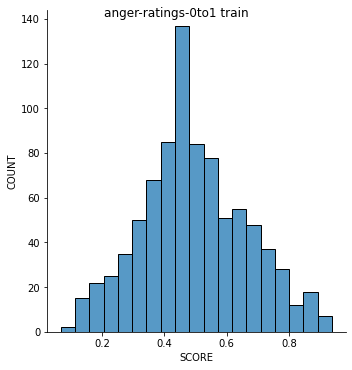

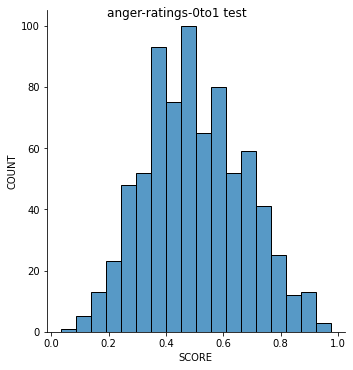

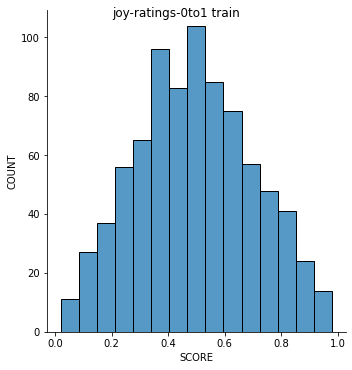

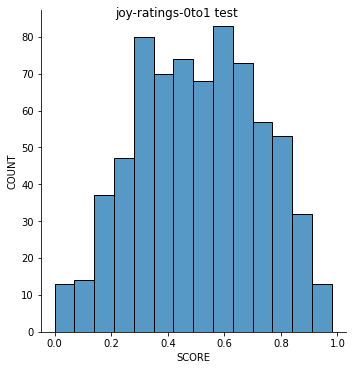

In [10]:
import seaborn as sns
for fil in all_files:
    name_of_file = " ".join(fil.split('/')[-1].split('.')[0:2])
    df = read_data(fil)

    scores = np.array(df['score'])
    ax = sns.displot(scores)
    ax.fig.suptitle(name_of_file)
    ax.set(xlabel='SCORE', ylabel='COUNT')
    #ax.title(name_of_file)